In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
model = 'SupervisedModelTraining____mars_gym_model_b____dc758ebad1_4bc07b0adc'
path = '/home/marlesson/workspace/booking_challenge/output/evaluation/EvaluationTask/results/'+model

In [3]:
df_city = pd.read_csv(path+'/dataset.csv')[['last_city_id', 'last_hotel_country']].drop_duplicates()
df_city.columns = ['city_id', 'hotel_country']
df_city['city_id'] = df_city['city_id'].astype(str)
df_city.head()

,city_id,hotel_country
0,38677,Cobra Island
1,36063,Gondal
2,36267,Glubbdubdrib
3,28319,Novistrana
4,17013,Borginia


In [67]:
df_report = pd.read_csv(path+'/classification_report.csv')
df_report.columns = ['city_id','precision','recall','f1-score','support']
resume_report = df_report.iloc[0]
df_report = df_report.merge(df_city)
df_report

,city_id,precision,recall,f1-score,support,hotel_country
0,47499,0.417936,0.653439,0.509804,378.0,Kangan
1,17013,0.577215,0.721519,0.641350,316.0,Borginia
2,36063,0.294118,0.605536,0.395928,289.0,Gondal
3,29319,0.352941,0.772727,0.484561,264.0,Cobra Island
4,2416,0.606061,0.905350,0.726073,243.0,Drusselstein
...,...,...,...,...,...,...
5523,41972,0.000000,0.000000,0.000000,1.0,Leutonia
5524,8581,0.000000,0.000000,0.000000,1.0,Gondal
5525,41974,0.000000,0.000000,0.000000,1.0,Fook Island
5526,32620,0.000000,0.000000,0.000000,1.0,Cobra Island


In [68]:
resume_report

city_id      weighted avg
precision         0.20387
recall           0.289188
f1-score         0.223803
support             21671
Name: 0, dtype: object

In [60]:
# df_report['percent_error'] = (df_report['f1-score'])/df_report['support']
# df_report.sort_values(['support'], ascending=False).head(20).sort_values(['percent_error'], ascending=True)

In [61]:
# g = sns.jointplot(x="index", y="f1-score", data=df_report.sample(frac=1).reset_index(drop=True).reset_index(),
#                   kind="reg", truncate=False,
#                   color="m", height=7)

In [62]:
#df_report[(df_report['hotel_country'] == 'Cobra Island') & (df_report['support'] > 10)]

In [49]:
df_report_by_coutry = df_report.groupby('hotel_country').agg({
                            'precision': 'mean', 
                            'recall': 'mean', 
                            'f1-score': 'mean',
                            'support': 'sum'})\
                        .sort_values('support', ascending=False )
df_report_by_coutry.head(10)

,precision,recall,f1-score,support
hotel_country,,,,
Gondal,0.026953,0.024084,0.022235,2398.0
Cobra Island,0.022807,0.023700,0.020304,2312.0
Fook Island,0.015393,0.019308,0.013702,2201.0
Glubbdubdrib,0.020223,0.031027,0.023085,1323.0
Elbonia,0.005896,0.009657,0.006657,1162.0
Kangan,0.067682,0.046699,0.047930,937.0
Borginia,0.053812,0.055592,0.051721,919.0
Bozatta,0.017551,0.013547,0.010334,736.0
Alvonia,0.016471,0.026829,0.019697,591.0


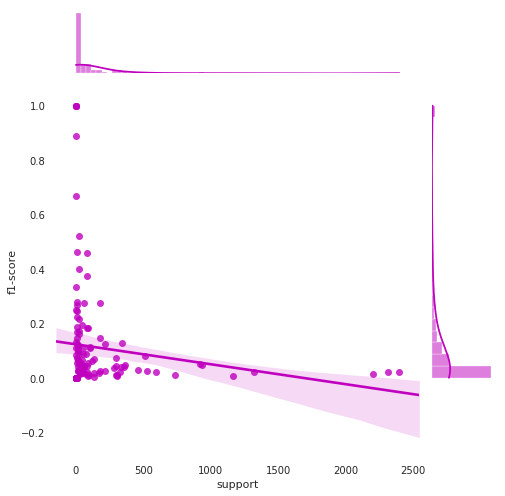

In [6]:
g = sns.jointplot(x="support", y="f1-score", data=df_report_by_coutry,
                  kind="reg", truncate=False,
                  color="m", height=7)

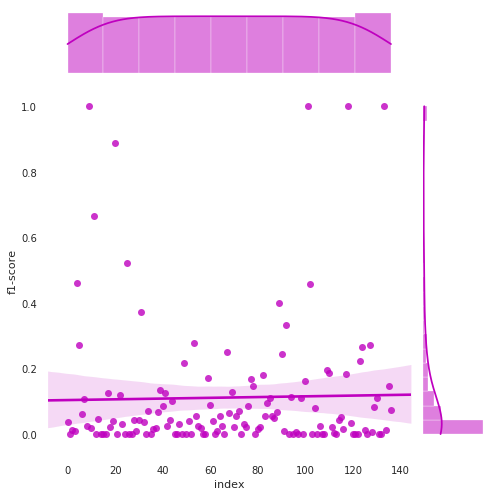

In [46]:
g = sns.jointplot(x="index", y="f1-score", data=df_report_by_coutry.sample(frac=1).reset_index(drop=True).reset_index(),
                  kind="reg", truncate=False,
                  color="m", height=7)

In [47]:
df_report_by_coutry['percent_error'] = (df_report_by_coutry['f1-score'])/df_report_by_coutry['support']
df_report_by_coutry.sort_values(['support'], ascending=False).head(20).sort_values(['percent_error'], ascending=True)

,precision,recall,f1-score,support,percent_error
hotel_country,,,,,
Elbonia,0.005896,0.009657,0.006657,1162.0,0.000006
Fook Island,0.015393,0.019308,0.013702,2201.0,0.000006
Cobra Island,0.022807,0.023700,0.020304,2312.0,0.000009
Gondal,0.026953,0.024084,0.022235,2398.0,0.000009
Bozatta,0.017551,0.013547,0.010334,736.0,0.000014
Glubbdubdrib,0.020223,0.031027,0.023085,1323.0,0.000017
Dawsbergen,0.008614,0.007934,0.008217,308.0,0.000027
Alvonia,0.016471,0.026829,0.019697,591.0,0.000033
Nevoruss,0.011836,0.016988,0.011345,306.0,0.000037


In [79]:
#df_report_by_coutry.sort_values('f1-score', ascending=False )

In [7]:
df_metric = pd.read_csv(path+'/metric.csv')
df_metric = df_metric.rename(columns={'predict': 'city_id'})
df_metric['city_id'] = df_metric['city_id'].astype(str)

#df_report.columns = ['city_id','precision','recall','f1-score','support']
df_metric = df_metric.merge(df_city)
df_metric = df_metric[['utrip_id', 'last_city_id', 'last_hotel_country', 'city_id', 'hotel_country']]
df_metric
#df_report

,utrip_id,last_city_id,last_hotel_country,city_id,hotel_country
0,1000033_1,38677,Cobra Island,38677,Cobra Island
1,1058931_1,38677,Cobra Island,38677,Cobra Island
2,1062458_1,34123,Cobra Island,38677,Cobra Island
3,1090572_2,38677,Cobra Island,38677,Cobra Island
4,1100088_2,27404,Cobra Island,38677,Cobra Island
...,...,...,...,...,...
21406,844989_1,8045,Elbonia,7051,Elbonia
21407,879618_2,63653,Rolisica,63653,Rolisica
21408,891404_1,4304,Drusselstein,15296,Drusselstein
21409,907591_2,33340,Yerba,19371,Yerba


In [70]:
from sklearn.metrics import classification_report

country_report = pd.DataFrame(
            classification_report(df_metric['last_hotel_country'], df_metric['hotel_country'], output_dict=True)
        ).transpose().sort_values('support', ascending=False )
country_report

/home/marlesson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marlesson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marlesson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
weighted avg,0.834034,0.838634,0.833353,21411.000000
macro avg,0.599854,0.563600,0.571841,21411.000000
Gondal,0.809808,0.746515,0.776874,2367.000000
Cobra Island,0.981041,0.968233,0.974595,2298.000000
Fook Island,0.804357,0.908015,0.853048,2196.000000
...,...,...,...,...
Shangri-La,0.000000,0.000000,0.000000,1.000000
Polrugaria,1.000000,1.000000,1.000000,1.000000
Rhelasia,0.000000,0.000000,0.000000,1.000000
Illéa,1.000000,1.000000,1.000000,1.000000


In [71]:
country_report.head(10)

,precision,recall,f1-score,support
weighted avg,0.834034,0.838634,0.833353,21411.0
macro avg,0.599854,0.563600,0.571841,21411.0
Gondal,0.809808,0.746515,0.776874,2367.0
Cobra Island,0.981041,0.968233,0.974595,2298.0
Fook Island,0.804357,0.908015,0.853048,2196.0
Glubbdubdrib,0.818649,0.851795,0.834893,1309.0
Elbonia,0.695964,0.680702,0.688248,1140.0
Kangan,0.885458,0.950802,0.916968,935.0
Borginia,0.981481,0.985777,0.983624,914.0
Bozatta,0.903846,0.896458,0.900137,734.0


In [74]:
country_report['percent_error'] = (country_report['f1-score'])/country_report['support']
country_report.sort_values(['support'], ascending=False).head(20).sort_values(['percent_error'], ascending=True)

,precision,recall,f1-score,support,percent_error
macro avg,0.599854,0.563600,0.571841,21411.0,0.000027
weighted avg,0.834034,0.838634,0.833353,21411.0,0.000039
Gondal,0.809808,0.746515,0.776874,2367.0,0.000328
Fook Island,0.804357,0.908015,0.853048,2196.0,0.000388
Cobra Island,0.981041,0.968233,0.974595,2298.0,0.000424
Elbonia,0.695964,0.680702,0.688248,1140.0,0.000604
Glubbdubdrib,0.818649,0.851795,0.834893,1309.0,0.000638
Dawsbergen,0.416667,0.162866,0.234192,307.0,0.000763
Kangan,0.885458,0.950802,0.916968,935.0,0.000981
Borginia,0.981481,0.985777,0.983624,914.0,0.001076


In [8]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, target_names = []):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
# Compute confusion matrix
#df_conf_metrix.head()

/home/marlesson/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Confusion matrix, without normalization


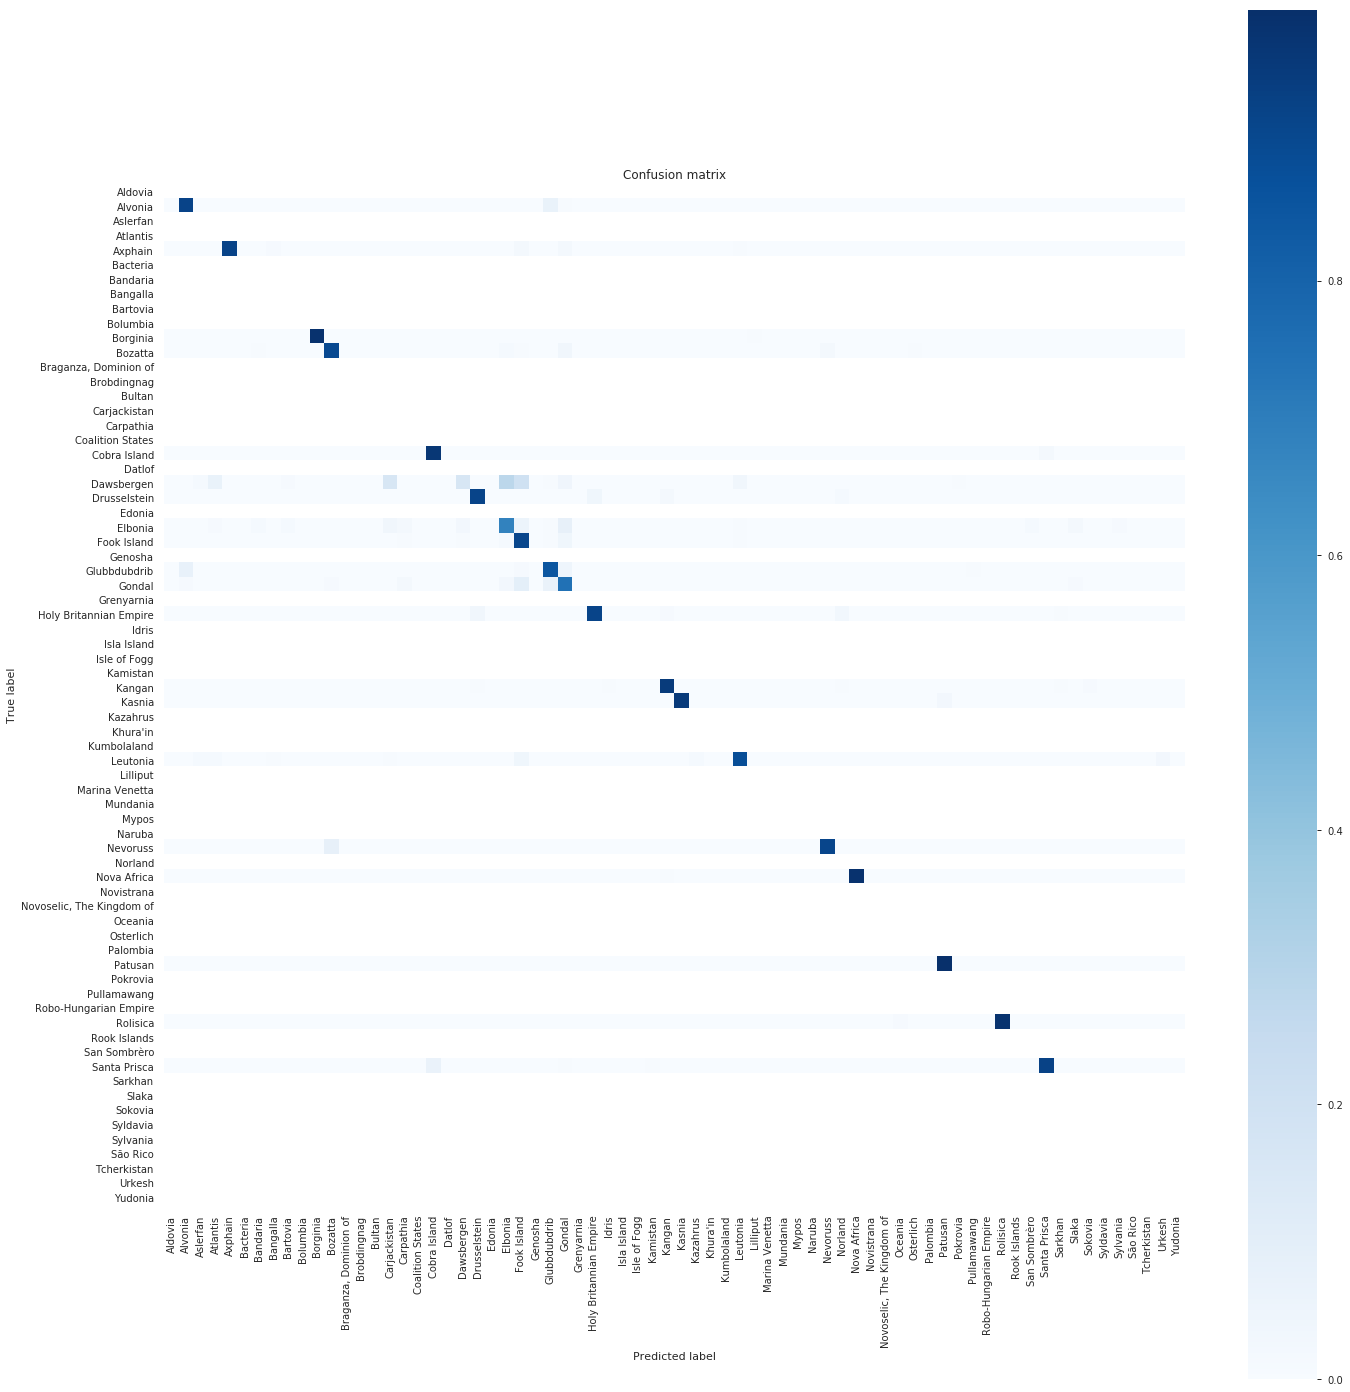

In [10]:
# Filter
top_coutry_sup = list(df_report_by_coutry.index)[:20]
df_conf_metrix = df_metric[df_metric['last_hotel_country'].isin(top_coutry_sup)]
y_test = df_conf_metrix['last_hotel_country']
y_pred = df_conf_metrix['hotel_country']


# Print
np.set_printoptions(precision=2)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
target_names  = np.unique(list(y_test.values) + list(y_pred.values))

print('Confusion matrix, without normalization')
plt.figure(figsize=(20, 20))
plot_confusion_matrix(cm_normalized, target_names=target_names)